# Benchmark for d-wave

In [1]:
from typing import Dict, Tuple, Set, List, Any

In [2]:
import matplotlib.pylab as plt

In [3]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

In [4]:
base_params = {
    "answer_mode": "raw",
    "auto_scale": True,
    "num_reads": 1,  # raw will dump out all results
}
sampler = DWaveSampler(solver="DW_2000Q_5")
embedding = EmbeddingComposite(sampler)

In [5]:
from qlp.mds import graph_tools as gt
from qlp.mds.qubo import get_mds_qubo
from qlp.mds.solver import classical_search, mds_schedule_submit

# Examples

## Most simple graph with unique sol

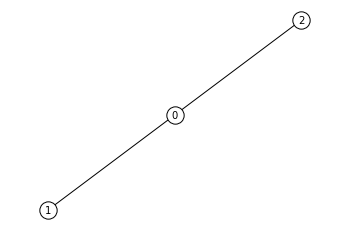

In [6]:
graph = {(1, 0,), (2, 0)}

gt.get_plot(graph)
plt.show()

In [7]:
qubo = get_mds_qubo(graph)
qubo.todense()

matrix([[-11,   8,   8,  -8, -16,  -8,  -8],
        [  8,  -7,   4,  -8, -16,  -8,   0],
        [  8,   4,  -7,  -8, -16,   0,  -8],
        [  0,   0,   0,  12,   8,   0,   0],
        [  0,   0,   0,   8,  32,   0,   0],
        [  0,   0,   0,   0,   0,  12,   0],
        [  0,   0,   0,   0,   0,   0,  12]], dtype=int32)

### Solve problem on D-Wave

100%|██████████| 128/128 [00:00<00:00, 6124.12it/s]

Brute force search classical minimal energy -11


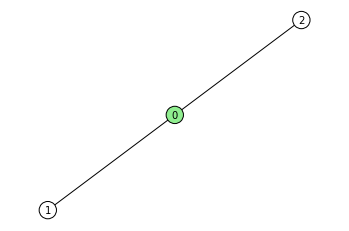

In [8]:
e, nodes = classical_search(qubo)
print("Brute force search classical minimal energy", e)
gt.get_plot(graph, nodes[0])
plt.show()

In [9]:
help(mds_schedule_submit)

Help on function mds_schedule_submit in module qlp.mds.solver:

mds_schedule_submit(graph: Set[Tuple[int, int]], p_schedules: List[Dict[str, Any]], embbedding: 'Embedding', **kwargs) -> List[Dict[str, Any]]
    Submits MDS with different schedules for the penalty term.
    
    The final state of each schedule is used as the initial_state for the next schedule.
    The first schedule does not use initial_state.
    Each schedule uses exactly one read (`num_reads=1`)
    
    Arguments:
        graph: The graph for the MDS defined by a set of edges.
        p_schedules: The penalty term schedules. A list of dicts with two keys:
            * the penalty (int)
            * and the schedule (list of tuples where the first entry is the start time
                and the second is the value for annealing parameters s).
        embbedding: The embedding used to `sample_qubo`.
        kwargs: Override `sample_qubo` parameters (besides `num_reads`).
    
    Returns:
        A list of dictino

In [10]:
p_schedules = [
    {"penalty": 1, "schedule": [(0, 0.0), (400, 1.0)]},
    {"penalty": 9, "schedule": [(0, 1.0), (200, 0.5), (400, 0.5), (600, 1.0)]},
]

In [11]:
results = mds_schedule_submit(graph, p_schedules, embedding)

In [12]:
results

[{'answer_mode': 'raw',
  'auto_scale': True,
  'num_reads': 1,
  'anneal_schedule': [(0, 0.0), (400, 1.0)],
  'penalty': 1,
  'initial_state': None,
  'final_state': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0},
  'energy_unshifted': 0.0,
  'energy': 3.0,
  'chain_break_fraction': 0.2857142857142857},
 {'answer_mode': 'raw',
  'auto_scale': True,
  'num_reads': 1,
  'reinitialize_state': False,
  'initial_state': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0},
  'anneal_schedule': [(0, 1.0), (200, 0.5), (400, 0.5), (600, 1.0)],
  'penalty': 9,
  'final_state': {0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 1},
  'energy_unshifted': -15.0,
  'energy': 12.0,
  'chain_break_fraction': 0.8571428571428571}]